# Part I: Data Preprocessing

## Basic settings

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os
import sys
import warnings
from datetime import datetime, timedelta

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 50
pd.options.display.max_columns = None

In [24]:
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

In [25]:
from data_generator.data_generator import check_missing_values
from utils.plots import plot_sales
from utils.utils import fill_missing_values, correct_outliers, get_sample_stores

In [26]:
DATA_DIR = "../data"

## Load and Clean data

In [27]:
# Load datasets
df_sales_2016 = pd.read_csv(os.path.join(DATA_DIR, "2016_sales.csv"))
df_sales_2017 = pd.read_csv(os.path.join(DATA_DIR, "2017_sales.csv"))
df_weather = pd.read_csv(os.path.join(DATA_DIR, "weather_data.csv"))

print("Sales data in 2016: ")
display(df_sales_2016.head())

print("Sales data in 2017: ")
display(df_sales_2017.head())

print("Weather data: ")
display(df_weather.head())

Sales data in 2016: 


,date,province,store_id,store_name,category,item_id,item_name,sales
0,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,1,Rice,9.0
1,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,2,Noodles,8.0
2,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,3,Bread,24.0
3,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,4,Flour,7.0
4,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,5,Cooking Oil,7.0


Sales data in 2017: 


,date,province,store_id,store_name,category,item_id,item_name,sales
0,2017-01-01,Hanoi,1,Hoan Kiem Market,Staples,1,Rice,16.0
1,2017-01-01,Hanoi,1,Hoan Kiem Market,Staples,2,Noodles,16.0
2,2017-01-01,Hanoi,1,Hoan Kiem Market,Staples,3,Bread,22.0
3,2017-01-01,Hanoi,1,Hoan Kiem Market,Staples,4,Flour,10.0
4,2017-01-01,Hanoi,1,Hoan Kiem Market,Staples,5,Cooking Oil,14.0


Weather data: 


,city,date,temperature,humidity,season
0,Hanoi,2016-01-01,13.4,88.4,winter
1,Ho Chi Minh City,2016-01-01,27.6,77.1,dry
2,Hanoi,2016-01-02,17.1,72.7,winter
3,Ho Chi Minh City,2016-01-02,25.4,75.2,dry
4,Hanoi,2016-01-03,18.3,71.1,winter


In [28]:
# Combine sales data
df_sales = pd.concat([df_sales_2016, df_sales_2017], ignore_index=True)

# Convert the date columns to datetime
df_sales["date"] = pd.to_datetime(df_sales["date"])
df_weather["date"] = pd.to_datetime(df_weather["date"])

display(df_sales.info()), display(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201025 entries, 0 to 201024
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        201025 non-null  datetime64[ns]
 1   province    201025 non-null  object        
 2   store_id    201025 non-null  int64         
 3   store_name  201025 non-null  object        
 4   category    201025 non-null  object        
 5   item_id     201025 non-null  int64         
 6   item_name   201025 non-null  object        
 7   sales       199016 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 12.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         1462 non-null   object        
 1   date         1462 non-null   datetime64[ns]
 2   temperature  1462 non-null   float64       
 3   humidity     1462 non-null   float64       
 4   season       1462 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 57.2+ KB


None

(None, None)

## Handle Missing values

In [29]:
display(check_missing_values(df_weather))

,counts,ratio (%)
city,0,0.0
date,0,0.0
temperature,0,0.0
humidity,0,0.0
season,0,0.0


In [30]:
display(check_missing_values(df_sales))

,counts,ratio (%)
date,0,0.0
province,0,0.0
store_id,0,0.0
store_name,0,0.0
category,0,0.0
item_id,0,0.0
item_name,0,0.0
sales,2009,1.0


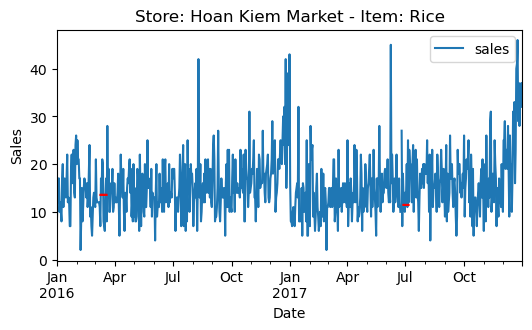

In [31]:
# Checking nan values and outliers in a plot
plot_sales(df_sales, store_id=1, item_id=1)

In [32]:
# Fill nan missing values with mean
df_sales_filled = fill_missing_values(df_sales)
check_missing_values(df_sales_filled)

,counts,ratio (%)
date,0,0.0
province,0,0.0
store_id,0,0.0
store_name,0,0.0
category,0,0.0
item_id,0,0.0
item_name,0,0.0
sales,0,0.0


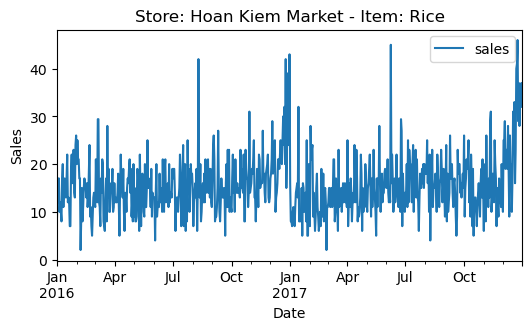

In [33]:
plot_sales(df_sales_filled)

## Check and correct outliers

In [34]:
df_sales_filled

,date,province,store_id,store_name,category,item_id,item_name,sales
0,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,1,Rice,9.0
1,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,2,Noodles,8.0
2,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,3,Bread,24.0
3,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,4,Flour,7.0
4,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,5,Cooking Oil,7.0
...,...,...,...,...,...,...,...,...
201020,2017-12-31,Ho Chi Minh City,10,Binh Thanh Market,Baby & Health,31,Baby Wipes,40.0
201021,2017-12-31,Ho Chi Minh City,10,Binh Thanh Market,Baby & Health,32,Pain Relievers,20.0
201022,2017-12-31,Ho Chi Minh City,10,Binh Thanh Market,Baby & Health,33,Vitamins,16.0
201023,2017-12-31,Ho Chi Minh City,10,Binh Thanh Market,Baby & Health,34,Cold & Flu Medicine,24.0


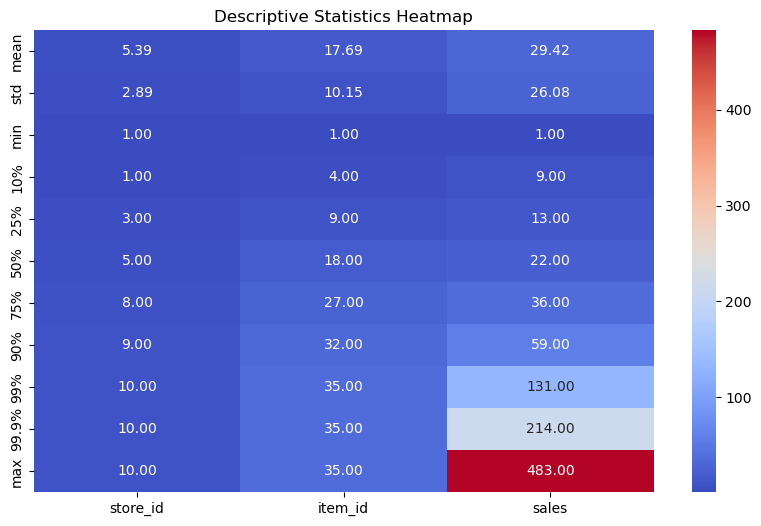

In [35]:
# Using hearmap to visualize outliers
summary = (
    df_sales_filled[["store_id", "item_id", "sales"]]
    .describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999])
    .iloc[1:]
)

plt.figure(figsize=(10, 6))
sns.heatmap(summary, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Descriptive Statistics Heatmap")
plt.show()

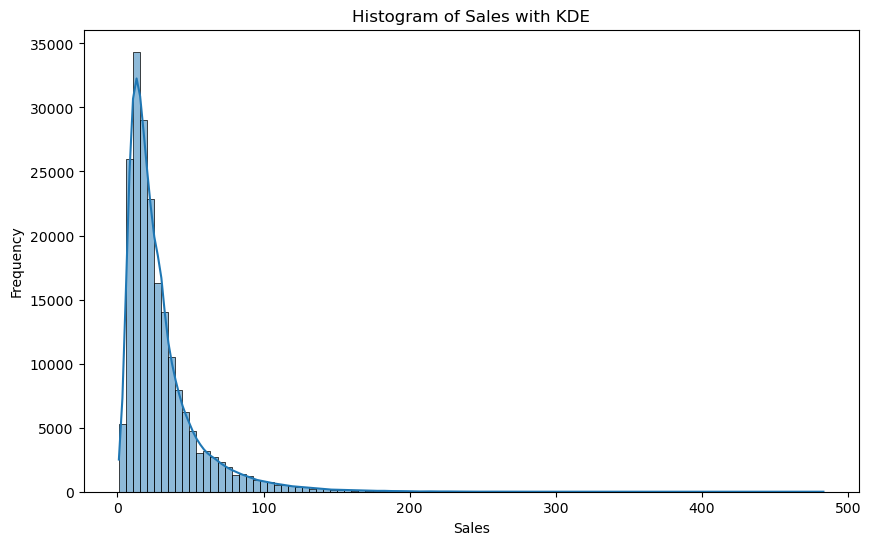

In [36]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_sales_filled["sales"], bins=100, kde=True)
plt.title("Histogram of Sales with KDE")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [37]:
df_sales_corrected = correct_outliers(df=df_sales_filled)

,store_id,item_id,sales
mean,5.392727,17.694545,27.061438
std,2.889226,10.152023,19.497636
min,1.000000,1.000000,1.000000
10%,1.000000,4.000000,9.000000
25%,3.000000,9.000000,13.000000
50%,5.000000,18.000000,22.000000
75%,8.000000,27.000000,34.000000
90%,9.000000,32.000000,54.000000
99%,10.000000,35.000000,95.000000
99.9%,10.000000,35.000000,106.000000


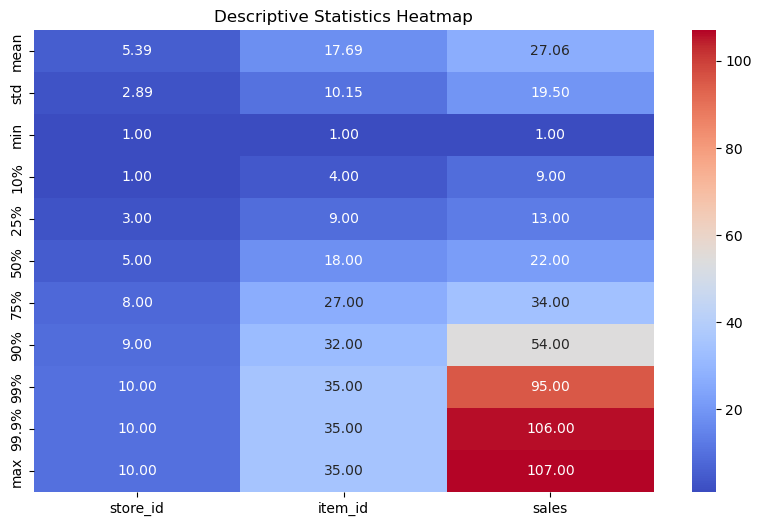

In [38]:
# Using hearmap to visualize outliers
summary_corrected = (
    df_sales_corrected[["store_id", "item_id", "sales"]]
    .describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999])
    .iloc[1:]
)

display(summary_corrected)

plt.figure(figsize=(10, 6))
sns.heatmap(summary_corrected, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Descriptive Statistics Heatmap")
plt.show()

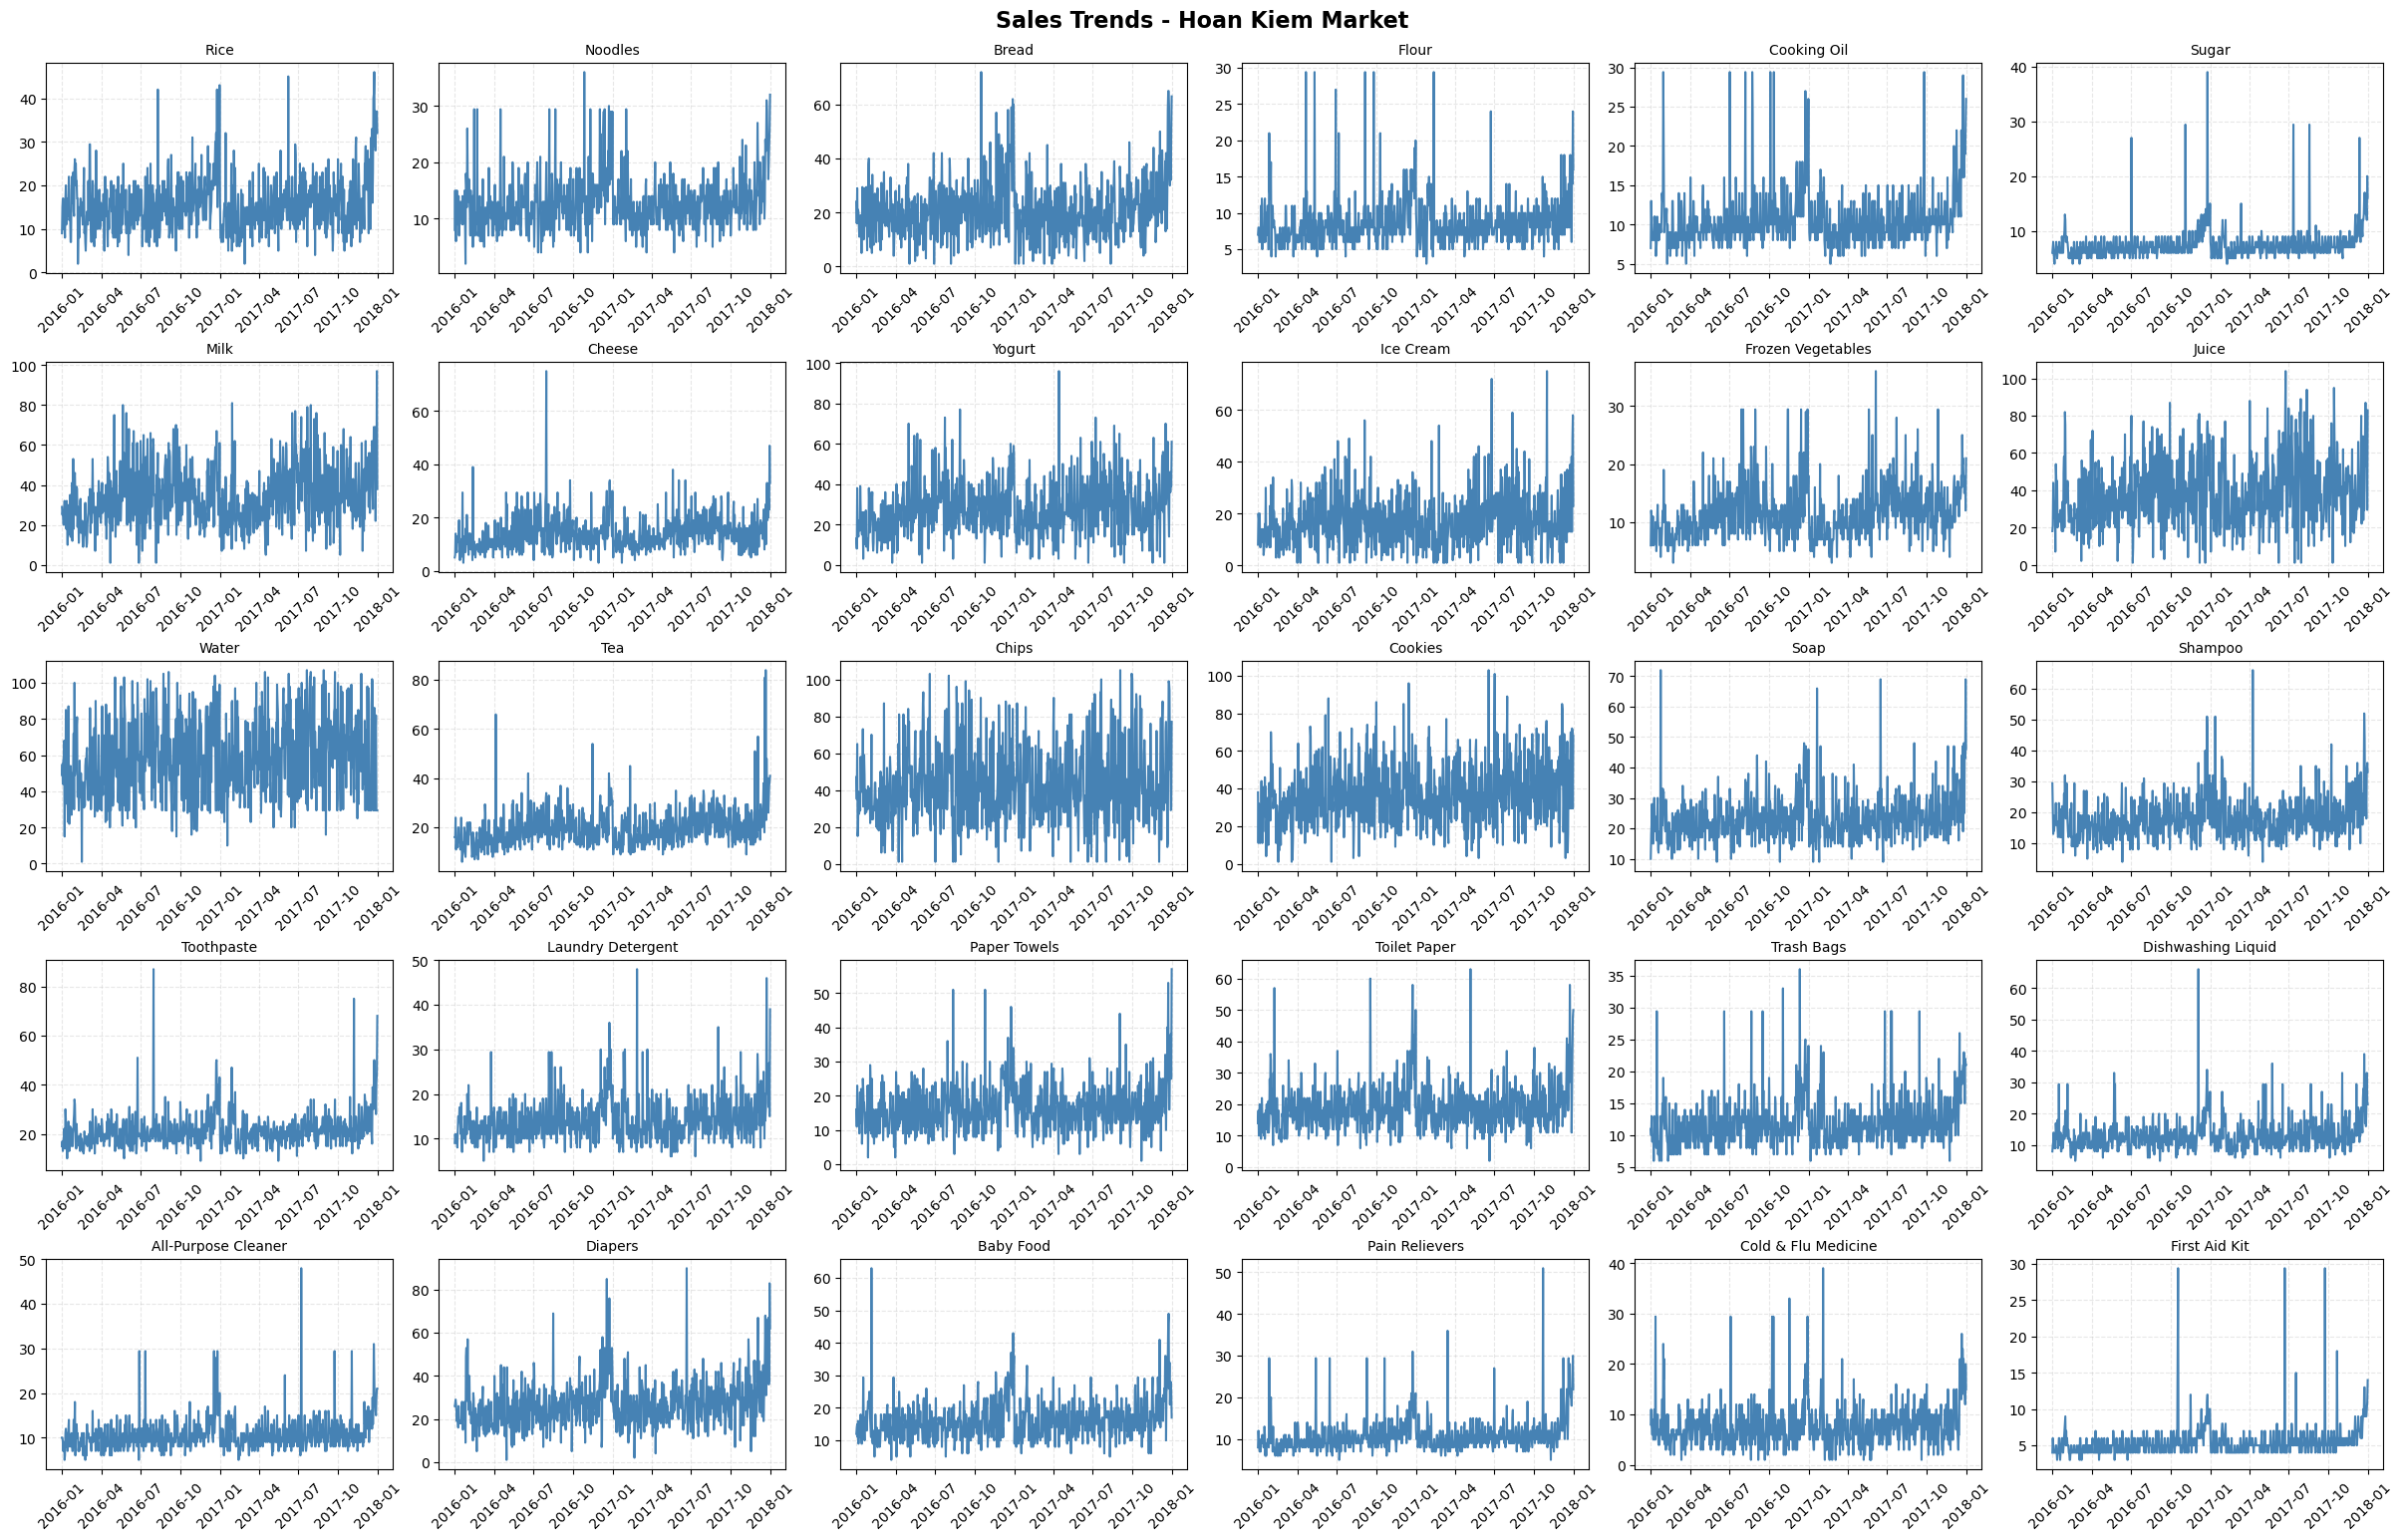

In [39]:
# Get targeted store
store_id = 1
df_sample_store = get_sample_stores(df_sales_corrected, store_id=store_id)
store_name = df_sample_store["store_name"].iloc[-1]

# Grid layout
nrows, ncols = 5, 6
fig, axes = plt.subplots(
    nrows, ncols, figsize=(ncols * 4, nrows * 3), constrained_layout=True
)
axes = axes.flatten()

lst_items = df_sample_store["item_id"].unique().tolist()

for idx, (item_id, ax) in enumerate(zip(lst_items, axes)):
    df2plot = df_sample_store.query("item_id == @item_id")
    item_name = df2plot["item_name"].iloc[-1]

    ax.plot(df2plot["date"], df2plot["sales"], color="steelblue", linewidth=1.5)
    ax.set_title(f"{item_name}", fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, linestyle="--", alpha=0.3)

# Hide unused subplots
for ax in axes[len(lst_items) :]:
    ax.axis("off")

# Main title
fig.suptitle(f"Sales Trends - {store_name}", fontsize=16, fontweight="bold", y=1.02)
plt.show()

In [40]:
check_missing_values(df_sales_corrected)

,counts,ratio (%)
date,0,0.0
province,0,0.0
store_id,0,0.0
store_name,0,0.0
category,0,0.0
item_id,0,0.0
item_name,0,0.0
sales,0,0.0


## Weather data

In [41]:
# Convert city in weather to province to match with sales data since the cities and provinces have the same names in the datasets
df_weather = df_weather.rename(columns={"city": "province"})

# Create a mapping between date and province to weather attributes
weather_mapping = df_weather.set_index(["date", "province"])
weather_mapping

temperature  humidity  season
date       province                                       
2016-01-01 Hanoi                    13.4      88.4  winter
           Ho Chi Minh City         27.6      77.1     dry
2016-01-02 Hanoi                    17.1      72.7  winter
           Ho Chi Minh City         25.4      75.2     dry
2016-01-03 Hanoi                    18.3      71.1  winter
...                                  ...       ...     ...
2017-12-29 Ho Chi Minh City         25.8      69.6     dry
2017-12-30 Hanoi                    19.1      79.5  winter
           Ho Chi Minh City         25.3      75.8     dry
2017-12-31 Hanoi                    19.9      81.9  winter
           Ho Chi Minh City         24.0      78.5     dry

[1462 rows x 3 columns]

## Save preprocessed data

In [42]:
# Saving sales data
sales_data_path = os.path.join(DATA_DIR, "sales_data_preprocessed.csv")
print(f"Saving sales data to :{sales_data_path}")
df_sales_corrected.to_csv(sales_data_path, index=False)

# Saving weather data
weather_data_path = os.path.join(DATA_DIR, "weather_preprocessed.csv")
print(f"Saving weather data to :{weather_data_path}")
df_weather.to_csv(weather_data_path, index=False)

Saving sales data to :../data\sales_data_preprocessed.csv
Saving weather data to :../data\weather_preprocessed.csv
